In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

import os
print(os.listdir("./input"))

['olivetti_faces.npy', 'olivetti_faces_target.npy']


In [2]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


In [3]:
data=np.load("./input/olivetti_faces.npy")
target=np.load("./input/olivetti_faces_target.npy")

In [4]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [5]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [6]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

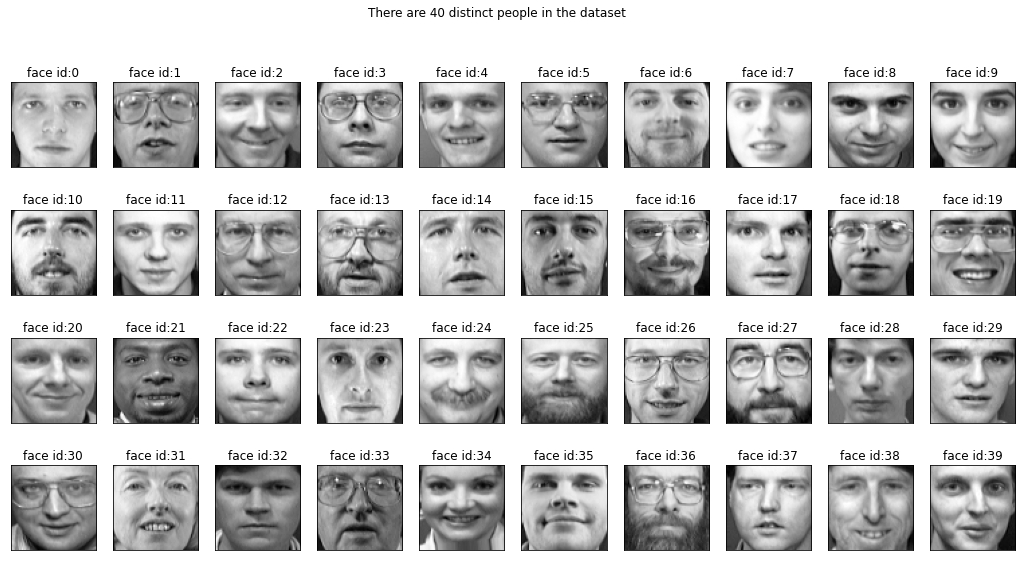

In [7]:
show_40_distinct_people(data, np.unique(target))

In [8]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

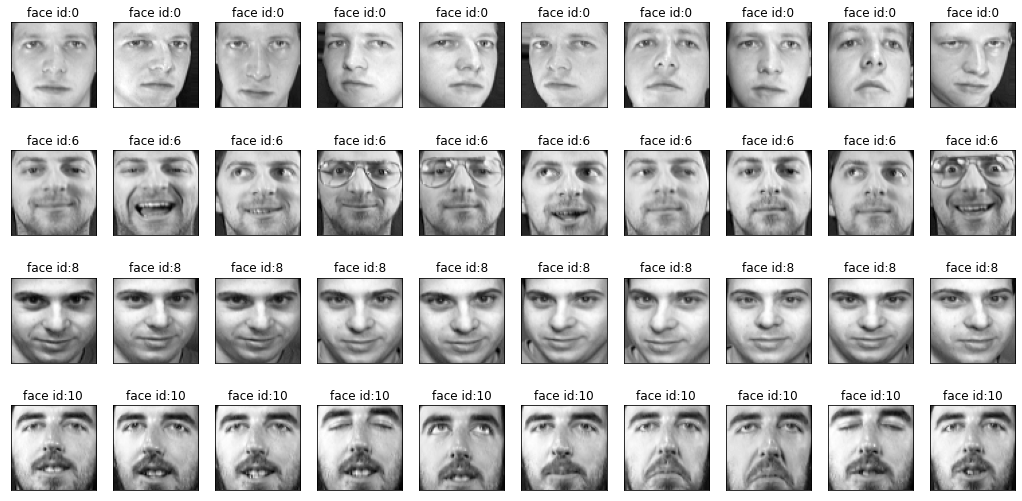

In [9]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,6,8,10])

In [10]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

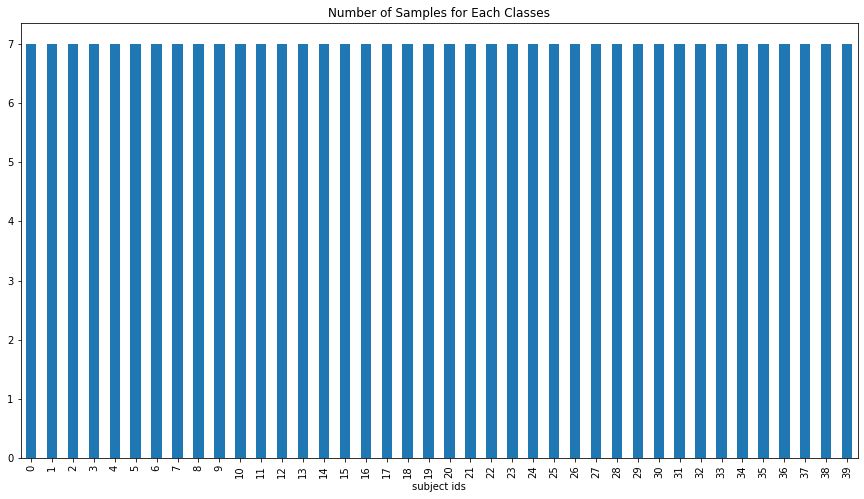

In [12]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

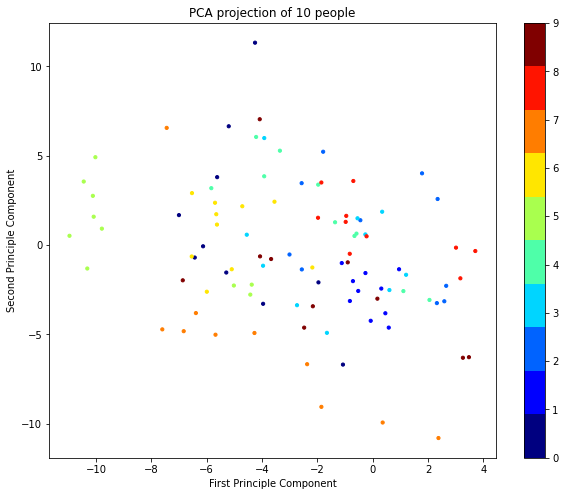

In [14]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

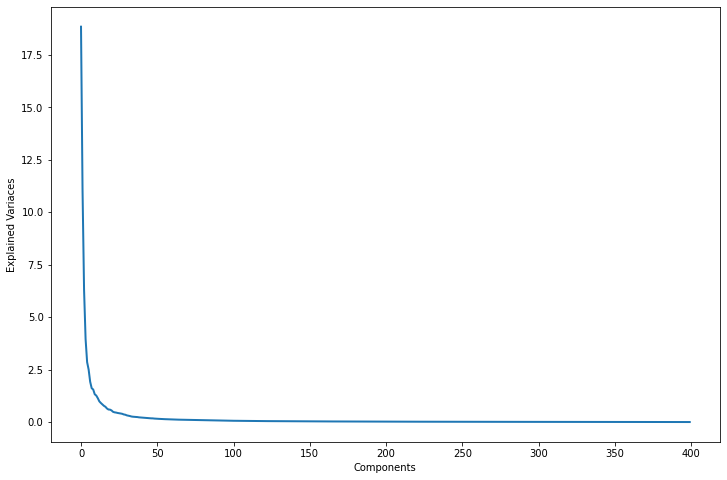

In [15]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [16]:
n_components=90

Text(0.5, 1.0, 'Average Face')

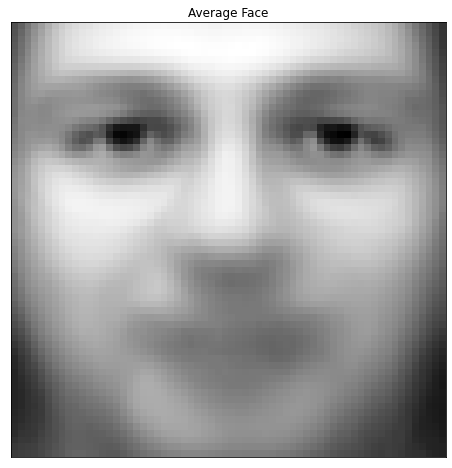

In [17]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

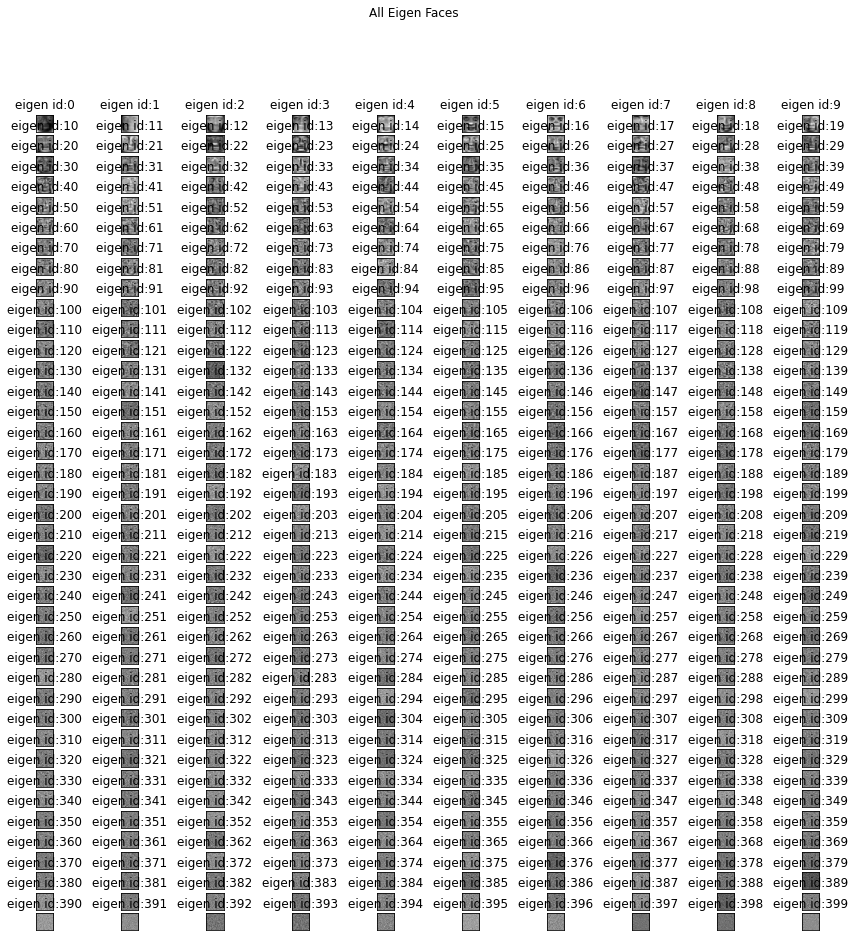

In [18]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [46]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [47]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.92


In [48]:
y_pred

array([39, 10, 33,  0, 37, 10, 28,  4, 27, 39,  5,  7, 28,  6, 13,  3, 35,
       26,  7, 13,  2, 27, 38, 16, 16, 35, 14,  2, 34, 37, 11, 32, 12, 22,
       28,  3, 39,  7, 33,  9,  5, 14, 39, 34,  6, 33, 20, 24, 34,  8, 36,
       31, 17, 21, 18, 20, 35, 22, 39, 36, 16, 29, 22, 30, 32, 21, 17, 36,
        8, 11, 10, 25, 38,  9, 26, 15, 17,  2,  6, 11, 29, 18, 16,  3, 14,
       13, 38, 32,  8, 21, 31,  5,  1, 19, 23, 27, 37,  1, 29, 30, 19,  3,
       22, 14, 19, 15, 39, 15, 23, 24, 20, 26, 18, 24, 30,  4, 23,  1,  0,
       12])

10


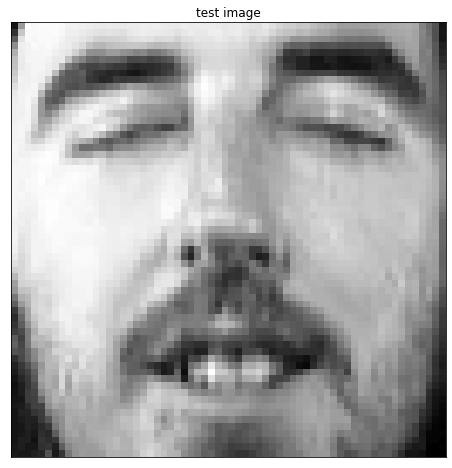

In [49]:
X_test2=X_test[1]
X_test2=X_test2.reshape(4096,1)
X_test_pca2=pca.transform(X_test2.reshape(4096,1))
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(X_test2.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('test image')
print(y_pred[1])

In [66]:
owners=[0,6,8,10]

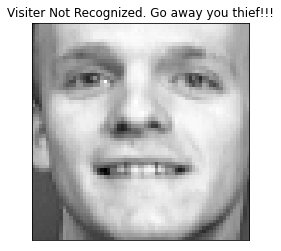

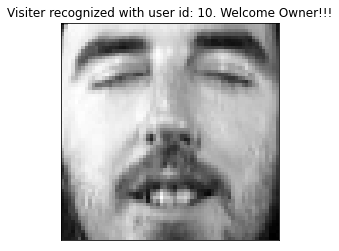

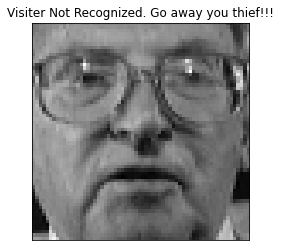

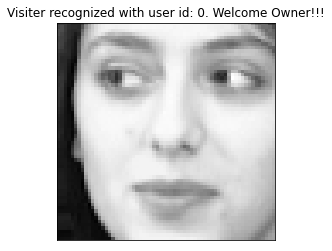

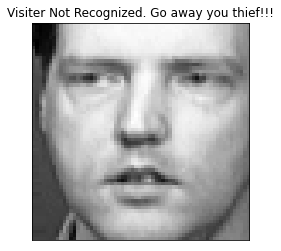

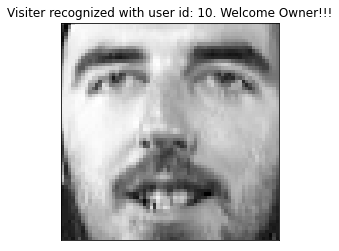

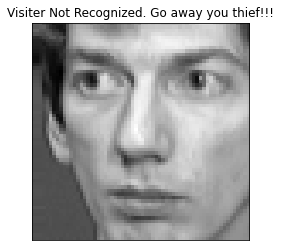

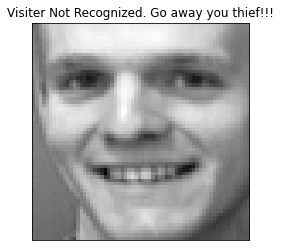

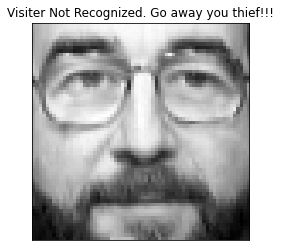

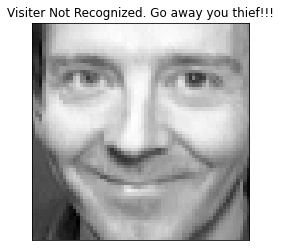

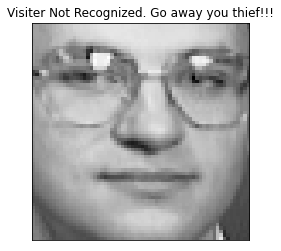

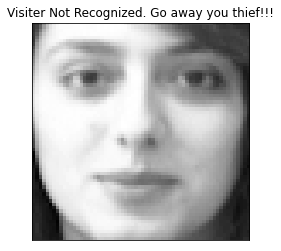

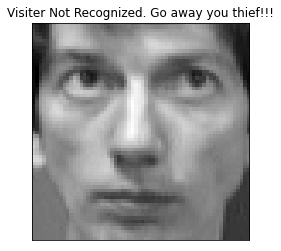

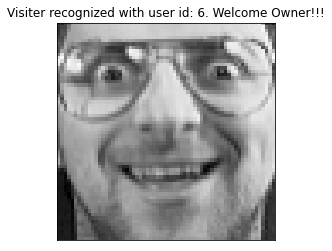

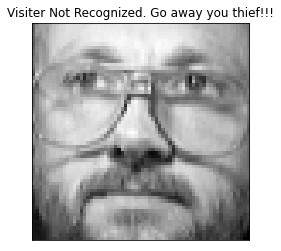

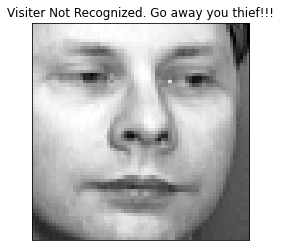

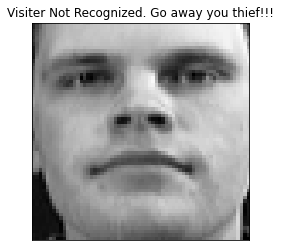

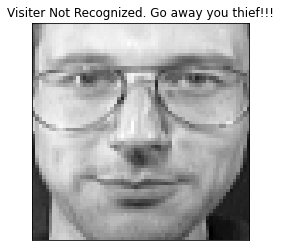

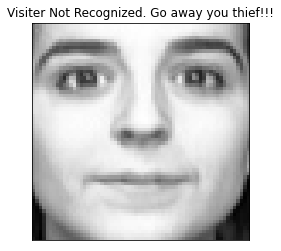

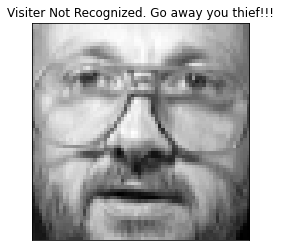

In [69]:
for i in range(20):
    X_test2=X_test[i]
    X_test2=X_test2.reshape(4096,1)
    X_test_pca2=pca.transform(X_test2.reshape(4096,1))
    fig,ax=plt.subplots(1,1,figsize=(4,4))
    ax.imshow(X_test2.reshape((64,64)), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if(y_pred[i] in owners):
        ax.set_title('Visiter recognized with user id: '+str(y_pred[i])+'. Welcome Owner!!!')
    else:
        ax.set_title('Visiter Not Recognized. Go away you thief!!!')